In [1]:
import itertools

import matplotlib.pyplot as plt
from matplotlib import ticker

plt.style.use("seaborn")

# Counting

### Ordered without replacement
Extract $r$ objects from $n$ is $$\frac{n!}{r!}$$

In [2]:
permutations = list(itertools.permutations("ABCDE", 2))
print(permutations)
len(permutations)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('C', 'E'), ('D', 'A'), ('D', 'B'), ('D', 'C'), ('D', 'E'), ('E', 'A'), ('E', 'B'), ('E', 'C'), ('E', 'D')]


20

### Ordered with replacement
Extract $r$ objects from $n$ is $$n^r$$

In [3]:
products = list(itertools.product("ABCDE", repeat=2))
print(products)
len(products)

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'A'), ('D', 'B'), ('D', 'C'), ('D', 'D'), ('D', 'E'), ('E', 'A'), ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'E')]


25

### Unordered without replacement
Extract $r$ objects from $n$ is $$\binom{n}{r}=\frac{n!}{r!(n-r)!}$$

In [4]:
combinations = list(itertools.combinations("ABCDE", 2))
print(combinations)
len(combinations)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'E'), ('D', 'E')]


10

### Unordered with replacement
Extract $r$ objects from $n$ is $$\binom{n+r-1}{r}=\frac{n!}{r!(n-r)!}$$

In [5]:
combinationswr = list(itertools.combinations_with_replacement("ABCDE", 2))
print(combinationswr)
len(combinationswr)

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'D'), ('D', 'E'), ('E', 'E')]


15

# Examples

## Poker

In [6]:
cards = list((n, p) for n in range(1, 14) for p in ["S", "H", "C", "D"])
print(cards)
combs = list(itertools.combinations(cards, 5))
print(len(combs))
combs[:3]

[(1, 'S'), (1, 'H'), (1, 'C'), (1, 'D'), (2, 'S'), (2, 'H'), (2, 'C'), (2, 'D'), (3, 'S'), (3, 'H'), (3, 'C'), (3, 'D'), (4, 'S'), (4, 'H'), (4, 'C'), (4, 'D'), (5, 'S'), (5, 'H'), (5, 'C'), (5, 'D'), (6, 'S'), (6, 'H'), (6, 'C'), (6, 'D'), (7, 'S'), (7, 'H'), (7, 'C'), (7, 'D'), (8, 'S'), (8, 'H'), (8, 'C'), (8, 'D'), (9, 'S'), (9, 'H'), (9, 'C'), (9, 'D'), (10, 'S'), (10, 'H'), (10, 'C'), (10, 'D'), (11, 'S'), (11, 'H'), (11, 'C'), (11, 'D'), (12, 'S'), (12, 'H'), (12, 'C'), (12, 'D'), (13, 'S'), (13, 'H'), (13, 'C'), (13, 'D')]
2598960


[((1, 'S'), (1, 'H'), (1, 'C'), (1, 'D'), (2, 'S')),
 ((1, 'S'), (1, 'H'), (1, 'C'), (1, 'D'), (2, 'H')),
 ((1, 'S'), (1, 'H'), (1, 'C'), (1, 'D'), (2, 'C'))]

In [7]:
hands_with_aces = list(
    filter(
        lambda hand: (1, "S") in hand
        and (1, "H") in hand
        and (1, "C") in hand
        and (1, "D") in hand,
        combs,
    )
)
print(len(hands_with_aces))

48


# Calculating an average

In [8]:
nums = [2, 4, 9, 12]
ordered_samples = list(itertools.product(nums, repeat=4))
print(len(ordered_samples))
ordered_samples[:3]

256


[(2, 2, 2, 2), (2, 2, 2, 4), (2, 2, 2, 9)]

In [9]:
counts = {}
for tup in ordered_samples:
    avg = sum(tup) / 4
    if avg in counts:
        counts[avg] += 1
    else:
        counts[avg] = 1

print(counts)

{2.0: 1, 2.5: 4, 3.75: 4, 4.5: 4, 3.0: 6, 4.25: 12, 5.0: 12, 5.5: 18, 6.25: 12, 7.0: 6, 3.5: 4, 4.75: 12, 6.0: 16, 6.75: 24, 7.5: 12, 7.25: 16, 8.0: 18, 8.75: 12, 9.5: 4, 4.0: 1, 5.25: 4, 6.5: 6, 7.75: 4, 8.5: 12, 9.25: 12, 10.0: 4, 9.0: 1, 9.75: 4, 10.5: 6, 11.25: 4, 12.0: 1}


<BarContainer object of 31 artists>

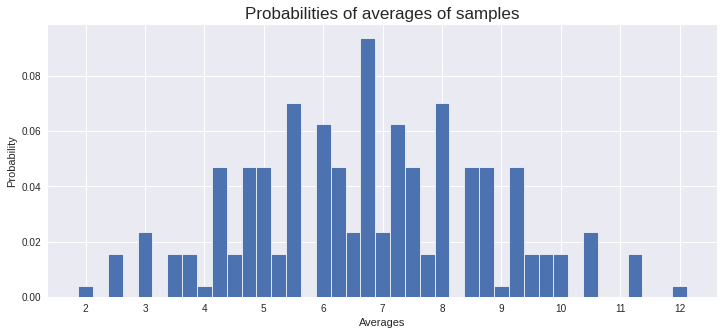

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_xticks(range(2, 13))
ax.set_xlabel("Averages")
ax.set_ylabel("Probability")
ax.set_title("Probabilities of averages of samples", fontsize=17)
ax.bar(
    counts.keys(),
    list(map(lambda x: x / 256, counts.values())),
    width=0.25,
    edgecolor="white",
    linewidth=0.7,
)